In [281]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm_notebook as tqdm
from tensorflow.keras.preprocessing import image

In [282]:
filtered_data = pd.read_csv("../data/FILTERED_FINAL_IMBD_DATA.csv", sep=',', engine='python', header=0, index_col=0)
filtered_data

,CODE,TITLE,DESCRIPTION,DURATION,COLOR,YEAR,DIRECTOR,BUDGET,CWG,RATING,VOTES,METASCORE RATING,GENRES,LANGUAGE,COUNTRY,CONTENT RATING,KEYWORDS,WRITERS,OPENING WEEKEND
0,tt0001790,Les misÃƒÂ©rables - Ãƒâ€°poque 1: Jean Valjean,The story begins with Jean Valjean as a humble...,1h,Black and White,(1913),Albert Capellani,"FRF50,000",unknown,"5,8",21,unknown,Drama,French,France,unknown,justice | based on novel | character name in t...,"Paul Capellani (adaptation), Victor Hugo (novel)",unknown
1,tt0001911,Sweet Nell of Old Drury,"At the opening of the story, Nell Gwynne, a po...",50min,Black and White,(1911),Raymond Longford,unknown,unknown,"4,1",7,unknown,Biography | Drama | History | Romance,English,Australia,unknown,king charles ii | nell gwynne | actress | lond...,"Mrs. Charles A. Doremus (play), Paul Kester (p...",unknown
2,tt0002101,Cleopatra,The fabled queen of Egypt's affair with Roman ...,1h 40min,Black and White,(1912),Charles L. Gaskill,"$45,000",unknown,"5,2",430,unknown,Drama | History,English,USA,See all certifications Ã‚Â»,character name as title | cleopatra character ...,Victorien Sardou (adapted from the play by),unknown
3,tt0002199,Del pesebre a la cruz,"An account of the life of Jesus Christ, based ...",1h,Black and White,(1912),Sidney Olcott,unknown,unknown,"5,7",453,unknown,Biography | Drama,English,USA,unknown,national film registry | jesus christ | egypt ...,Gene Gauntier (scenario),unknown
4,tt0002423,Madame DuBarry,"The story of Madame DuBarry, the mistress of L...",1h 25min,Black and White,(1919),Ernst Lubitsch,unknown,unknown,"6,8",723,unknown,Biography | Drama | Romance,German,Germany,See all certifications Ã‚Â»,character name as title | king louis xv charac...,"Norbert Falk (as Fred Orbing), Hanns KrÃƒÂ¤ly",unknown
5,tt0002445,Quo Vadis?,"An epic Italian film ""Quo Vadis"" influenced ma...",2h,Black and White,(1913),Enrico Guazzoni,"ITL45,000",unknown,"6,1",249,unknown,Drama | History,Italian,Italy,See all certifications Ã‚Â»,spectacle | epic | christian | roman empire | ...,"Henryk Sienkiewicz (novel), Enrico Guazzoni",unknown
6,tt0002514,De svarta maskerna,"""The Black Masks"", a secret political society,...",1h,Black and White,(1912),Mauritz Stiller,unknown,unknown,"5,9",7,unknown,Drama,Swedish,Sweden,unknown,silent era film from sweden | spy | chemin de ...,"Sigrid Calamnius, Charles Magnusson | 1 more c...",unknown
7,tt0002588,Zigomar contre Nick Carter,Add a Plot Ã‚Â»,48min,Black and White,(1912),Victorin-Hippolyte Jasset,unknown,unknown,"6,4",14,unknown,Crime | Thriller,French,France,unknown,based on novel | See All (1) Ã‚Â»,"Victorin-Hippolyte Jasset, LÃƒÂ©on Sazie (novel)",unknown
8,tt0002628,Der Andere,A man has an accident while out riding his hor...,48min,Black and White,(1913),Max Mack,unknown,unknown,"5,8",64,unknown,Drama | Thriller,German,Germany,unknown,accident | horse | split personality | somnamb...,"Paul Lindau (play), Max Mack | 1 more credit Ã‚Â»",unknown
9,tt0002646,Atlantis,After Dr. Friedrich's wife becomes mentally un...,2h 1min,Black and White,(1913),August Blom,unknown,unknown,"6,6",318,unknown,Drama,Danish,Denmark,unknown,statue of liberty | ship | ocean | new york | ...,"Axel Garde, Gerhart Hauptmann (novel) | 1 more...",unknown


In [283]:
code_list_filtered_data = list(filtered_data['CODE'])

In [284]:
dir = '../data/img/'
dirImages = os.listdir(dir)

In [285]:
import pandas as pd

string = '.png'

filtered_ListImages = (pd.Series(code_list_filtered_data) + string).tolist()
len(filtered_ListImages)

113646

In [286]:
filtered_ListImages

['tt0001790.png',
 'tt0001911.png',
 'tt0002101.png',
 'tt0002199.png',
 'tt0002423.png',
 'tt0002445.png',
 'tt0002514.png',
 'tt0002588.png',
 'tt0002628.png',
 'tt0002646.png',
 'tt0002822.png',
 'tt0002844.png',
 'tt0002885.png',
 'tt0002898.png',
 'tt0002922.png',
 'tt0003022.png',
 'tt0003037.png',
 'tt0003131.png',
 'tt0003159.png',
 'tt0003165.png',
 'tt0003167.png',
 'tt0003241.png',
 'tt0003362.png',
 'tt0003365.png',
 'tt0003643.png',
 'tt0003657.png',
 'tt0003665.png',
 'tt0003668.png',
 'tt0003670.png',
 'tt0003675.png',
 'tt0003731.png',
 'tt0003740.png',
 'tt0003772.png',
 'tt0003854.png',
 'tt0003890.png',
 'tt0003930.png',
 'tt0003952.png',
 'tt0003973.png',
 'tt0004066.png',
 'tt0004099.png',
 'tt0004121.png',
 'tt0004134.png',
 'tt0004150.png',
 'tt0004167.png',
 'tt0004179.png',
 'tt0004181.png',
 'tt0004272.png',
 'tt0004307.png',
 'tt0004313.png',
 'tt0004387.png',
 'tt0004390.png',
 'tt0004391.png',
 'tt0004457.png',
 'tt0004525.png',
 'tt0004593.png',
 'tt000463

In [287]:
dirImages = set (dirImages)
filtered_ListImages = set(filtered_ListImages)
films_in_comon = dirImages.intersection(filtered_ListImages)

In [288]:
films_in_comon = list(films_in_comon)

In [289]:
len(films_in_comon)

107181

In [337]:
array_img = []
for id_image in tqdm(films_in_comon[19000:20000]):
        img_load = image.load_img(dir + id_image)
        img_array = image.img_to_array(img_load)
        array_img = array_img + [[id_image,img_array]]

In [304]:
df_img

,CODE,img_values
0,tt0384802.png,"[[[142.0, 107.0, 249.0], [146.0, 111.0, 255.0]..."


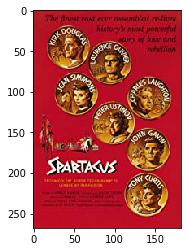

In [311]:
from pylab import imread,subplot,imshow,show

import matplotlib.pyplot as plt



plt.imshow(array_img[9][1]/255)

In [312]:
df = pd.DataFrame(array_img)

In [313]:
df

KeyboardInterrupt: 